# BL40A2030 Wireless Communication Networks

## Week 4: Wireless networks - Distances

## Author: Pedro Nardelli

### References 

#### Markdown syntax for writing in the notebook

[Markdown syntax](https://help.github.com/articles/basic-writing-and-formatting-syntax/)

#### Library for numerical calculation in Python

[Numpy](http://www.numpy.org/)

#### Satistical functions

[scipy.stats](Statistical functions)

#### Spatial manipulation in Scipy

[scipy.spatial](https://docs.scipy.org/doc/scipy-0.14.0/reference/spatial.html)

#### Plot in Python

[Matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
from scipy.spatial import distance
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

## Regular topology

#### Line

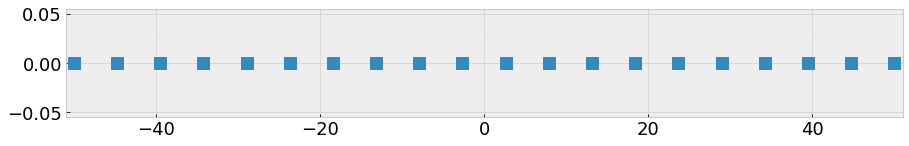

In [2]:
#Network size (square)
L = 100
#Number of nodes
n = 20
#
#Regular distribution in x
position_x_realization = np.linspace(-L/2, L/2 , n) 
#All 0 in y
position_y_realization = np.zeros(n) 

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(15,2))
plt.plot(position_x_realization, position_y_realization, 's',markersize=12)
plt.xlim(-L/2-1,L/2+1)
plt.show()

#### Square

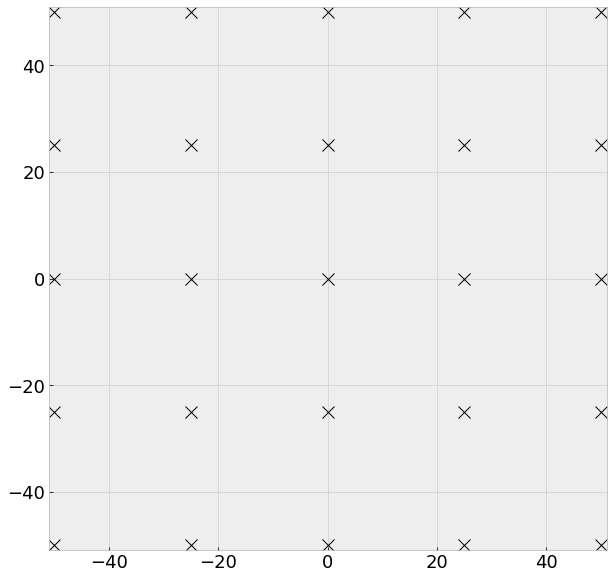

In [3]:
#Network size (square)
L = 100
#This is the sqrt of the number
n = 5
#
#Regular distribution in x
position_x_realization_aux = np.linspace(-L/2, L/2 , n) 
#Regular distribution in y
position_y_realization_aux = np.linspace(-L/2, L/2 , n) 
#
position_x_realization, position_y_realization = np.meshgrid(position_x_realization_aux, position_y_realization_aux)

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,10))
plt.plot(position_x_realization, position_y_realization, 'k x',markersize=12)
plt.xlim(-L/2-1,L/2+1)
plt.ylim(-L/2-1,L/2+1)
plt.show()

#### Dimond

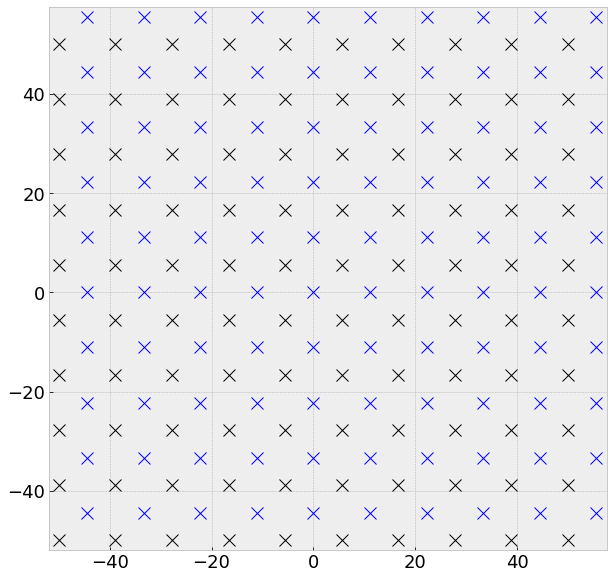

In [4]:
#Network size (square)
L = 100
#This is the sqrt of the number
n = 10
#
#Regular distribution in x
position_x_realization_aux1 = np.linspace(-L/2, L/2 , n) 
#Regular distribution in x
position_y_realization_aux1 = np.linspace(-L/2, L/2 , n) 
#
position_x_realization1, position_y_realization1 = np.meshgrid(position_x_realization_aux1, position_y_realization_aux1)
#####
#Regular distribution in x
position_x_realization_aux2 = np.linspace(-L/2 + (position_x_realization_aux1[1] - position_x_realization_aux1[0])/2, L/2 + (position_x_realization_aux1[1] - position_x_realization_aux1[0])/2 , n) 
#Regular distribution in x
position_y_realization_aux2 = np.linspace(-L/2 + (position_y_realization_aux1[1] - position_y_realization_aux1[0])/2, L/2 + (position_y_realization_aux1[1] - position_y_realization_aux1[0])/2 , n) 
#
position_x_realization2, position_y_realization2 = np.meshgrid(position_x_realization_aux2, position_y_realization_aux2)


plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,10))
plt.plot(position_x_realization1, position_y_realization1, 'k x',markersize=12)
plt.plot(position_x_realization2, position_y_realization2, 'b x',markersize=12)
plt.xlim(-L/2-2,L/2 + (position_x_realization_aux1[1] - position_x_realization_aux1[0])/2 + 2)
plt.ylim(-L/2-2,L/2 + (position_y_realization_aux1[1] - position_y_realization_aux1[0])/2 + 2)
plt.show()

## Random topology

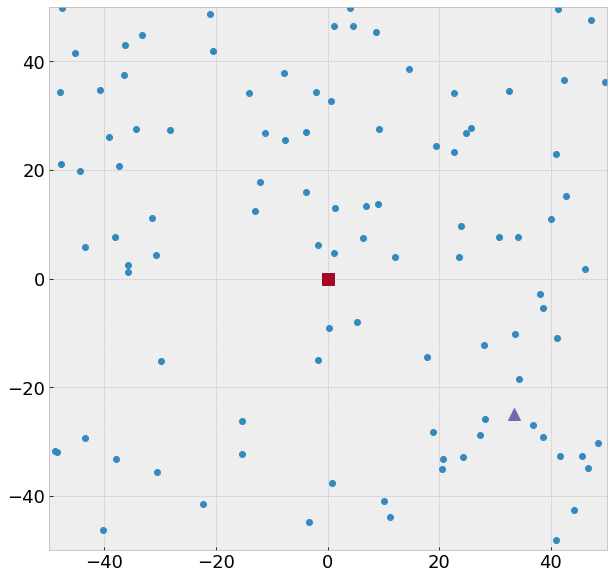

In [5]:
#Network size (square)
L = 100
#Number of nodes
n = 100
#
#Uniform distribution in x
position_x_realization = np.random.uniform(-L/2,L/2,n)

#Uniform distribution in y
position_y_realization = np.random.uniform(-L/2,L/2,n)

# Figure
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10, 10))
plt.plot(position_x_realization, position_y_realization, 'o')
plt.plot(0, 0, 's',markersize=12)
plt.plot(L/3, -L/4, '^',markersize=12)
plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)
plt.show()

### Condider a receiver in the center i.e. (x=0, y=0) and the other point (x=L/3, y=-L/4). How the distances from the points are distributed? 

- Let's build a histogram

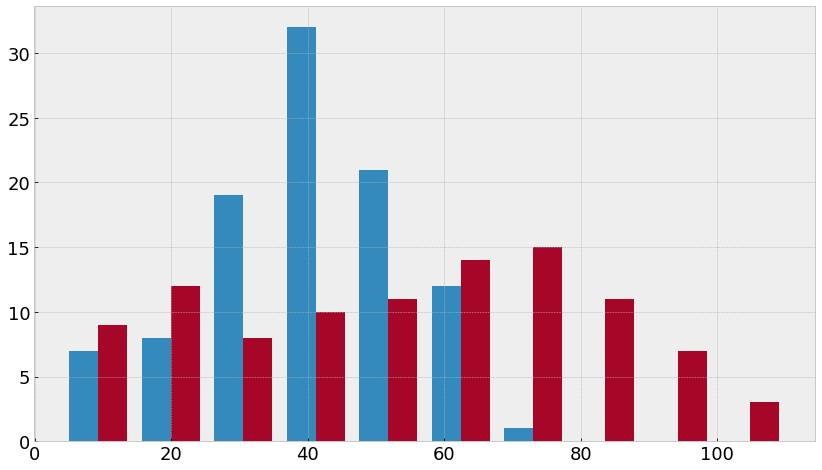

In [6]:
#Manipulating arrays to compute distances
position_x_realization_t = np.transpose(position_x_realization) 
position_y_realization_t = np.transpose(position_y_realization) 
position_final = []
position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
#position_final
###############
#The distance to the rx1 (0,0)
###
distance_rx1 = []
distance_rx1 = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
#The distance to the rx2 (L/3, -L/4)
distance_rx2 = []
distance_rx2 = [distance.euclidean(position_final[i],[L/3, -L/4]) for i in range(n)]
###Plot
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.hist([distance_rx1,distance_rx2])
plt.show()

#### Try yourself with different rx positions, and test the impact of the network size.

## Generate a 2-D Poisson Point Process

number of points: 93


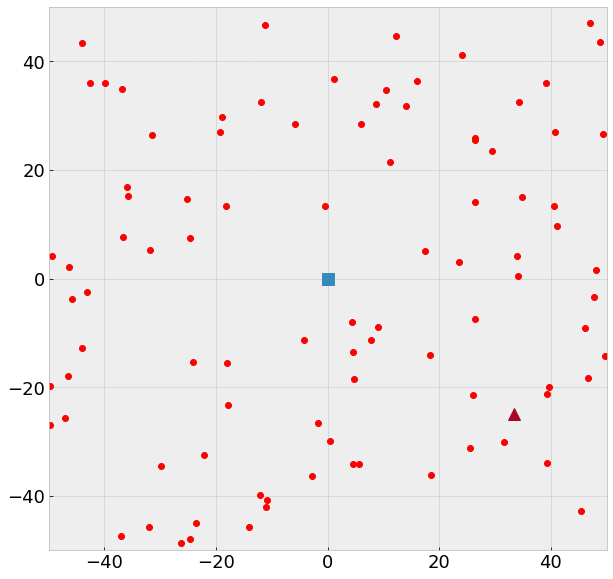

In [7]:
#Network size (square)
L = 100
#Number of nodes
mean_poisson = 100
n = np.random.poisson(mean_poisson)
print('number of points:', n)
#
#Uniform distribution in x
position_x_realization = np.random.uniform(-L/2,L/2,n)

#Uniform distribution in y
position_y_realization = np.random.uniform(-L/2,L/2,n)

# Figure
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10, 10))
plt.plot(position_x_realization, position_y_realization, 'r o')
plt.plot(0, 0, 's',markersize=12)
plt.plot(L/3, -L/4, '^',markersize=12)
plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)
plt.show()

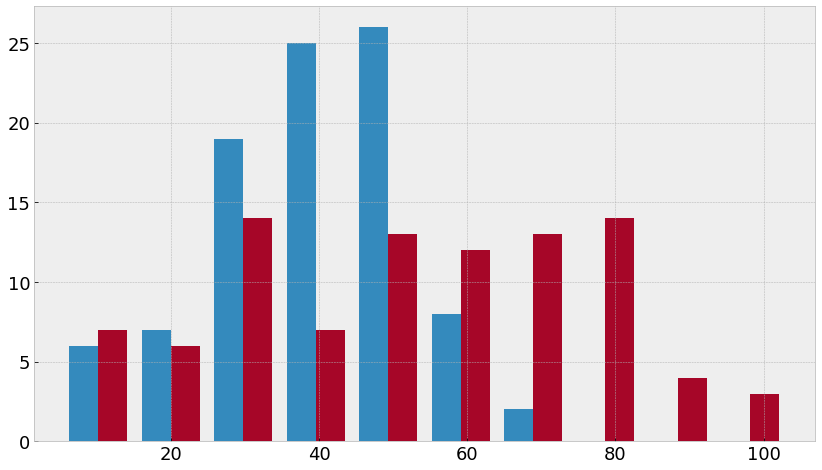

In [8]:
#Manipulating arrays to compute distances
position_x_realization_t = np.transpose(position_x_realization) 
position_y_realization_t = np.transpose(position_y_realization) 
position_final = []
position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
#position_final
###############
#The distance to the rx1 (0,0)
###
distance_rx1 = []
distance_rx1 = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
#The distance to the rx2 (L/3, -L/4)
distance_rx2 = []
distance_rx2 = [distance.euclidean(position_final[i],[L/3, -L/4]) for i in range(n)]
###Plot
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.hist([distance_rx1,distance_rx2])
plt.show()

### Try with different means for Poisson

## Lets compare Poisson number and fixed number (binomial) of elements

number of points in Poisson: 96


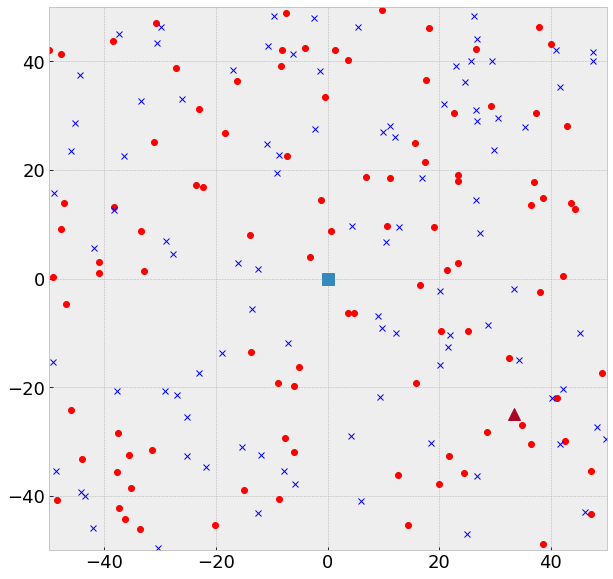

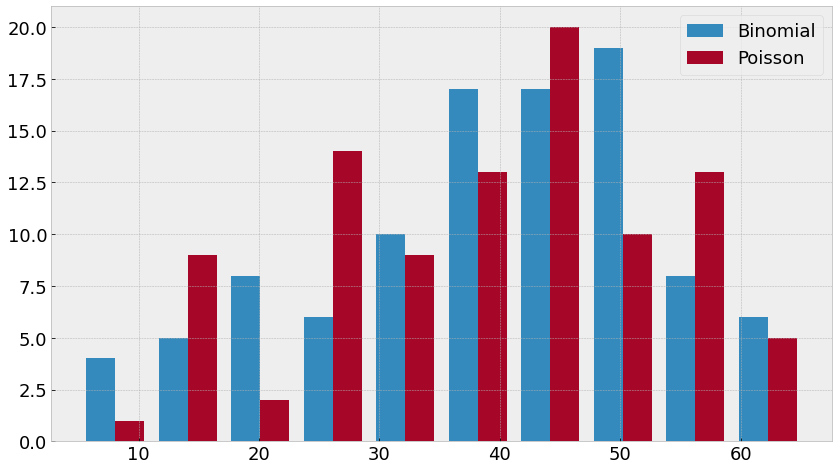

In [9]:
#Network size (square)
L = 100
#### Binomial
#Number of nodes
n = 100
#
#Uniform distribution in x
position_x_realization1 = np.random.uniform(-L/2,L/2,n)

#Uniform distribution in y
position_y_realization1 = np.random.uniform(-L/2,L/2,n)

#Manipulating arrays to compute distances
position_x_realization1_t = np.transpose(position_x_realization1)
position_y_realization1_t = np.transpose(position_y_realization1)
position_final1 = []
position_final1 = [[position_x_realization1_t[i], position_y_realization1_t[i]] for i in range(n)]
n1=n
##### Poisson
#Number of nodes
mean_poisson = 100
n = np.random.poisson(mean_poisson)
print('number of points in Poisson:', n)
#
#Uniform distribution in x
position_x_realization2 = np.random.uniform(-L/2,L/2,n)

#Uniform distribution in y
position_y_realization2 = np.random.uniform(-L/2,L/2,n)

#Manipulating arrays to compute distances
position_x_realization2_t = np.transpose(position_x_realization2)
position_y_realization2_t = np.transpose(position_y_realization2)
position_final2 = []
position_final2 = [[position_x_realization2_t[i], position_y_realization2_t[i]] for i in range(n)]
n2=n
#The distance to the rx1 (0,0)
###
distance_rx1 = []
distance_rx1 = [distance.euclidean(position_final1[i],[0,0]) for i in range(n1)]
##
distance_rx2 = []
distance_rx2 = [distance.euclidean(position_final2[i],[0,0]) for i in range(n2)]

###Plot
# Figure
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10, 10))
plt.plot(position_x_realization1, position_y_realization1, 'r o')
plt.plot(position_x_realization2, position_y_realization2, 'b x')
plt.plot(0, 0, 's',markersize=12)
plt.plot(L/3, -L/4, '^',markersize=12)
plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)
plt.show()


###
lab = ['Binomial', 'Poisson']
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.hist([distance_rx1,distance_rx2], label=lab)
plt.legend()
plt.show()

### Try many times and try to see the differences

### Do it with different reference points, not only (0,0)